## MATH 157
# Post-Quantum Cryptography Pt. I
## By Delia McGrath

References:
- http://www.cse.iitm.ac.in/~shwetaag/papers/PQC.pdf
- https://www.maths.ox.ac.uk/system/files/attachments/sage-introduction.pdf
- https://doc.sagemath.org/pdf/en/reference/cryptography/cryptography.pdf
- https://towardsdatascience.com/a-python-tutorial-on-generating-and-plotting-a-3d-guassian-distribution-8c6ec6c41d03
- https://tel.archives-ouvertes.fr/tel-01245066v2/document
- https://www.newton.ac.uk/files/seminar/20140509093009501-202978.pdf
- https://www.cwi.nl/news/2021/new-code-breaking-record-for-quantum-safe-cryptography
- https://slideplayer.com/slide/5215442/
- https://cr.yp.to/talks/2017.12.28/slides-dan+nadia+tanja-20171228-latticehacks-16x9.pdf
- https://qvault.io/cryptography/very-basic-intro-to-lattices-in-cryptography/
- https://eprint.iacr.org/2020/1237.pdf

<img src = "humour.gif" alt="laugh" width="800"/>


### Background

Post-quantum cryptography is the development of cryptographic systems for classical computers that are able to prevent attacks launched by quantum computers. This is particularly important as quantum computers are able to solve difficult problems much faster than regular computers (to the point that a quantum computer may be able to solve a problem that would even be impossible on a regular computer).

Thus, research is being made to better secure data and encrypt.

There is currently focus on
- Lattice based
- Multivariate
- Hash-based
- Code based
- Supersingular elliptic curve isogeny
- Symmetric-key-based

We will only look into two parts today, but if any sound interesting, research them because they are :)

## Lattice Based Cryptography

In order to provide security against quantum computers, cryptologists designed the next generation of public-key cryptography based on maathematical problems studied for decades - the lattice.

Put simply, a **lattice** a grid of points in multidimensional space

<img src = "lattice.png" alt="lattices" width="300"/>

More detailed, a lattice is the set of all linear integer combinations of basis vectors.

(A basis vector is one vector of a basis, which is a family of linearly independent vectors which spans a vector space -- Can be thought of as vectors for simplicity)

Most important lattice-based computational problem is the **Shortest Vector Problem (SVP)** approximate the minimal Euclidean length of a non-zero lattice vector.

<img src = "svp.png" alt="lattices" width="300"/>

This is hard to solve *efficiently* even with approximation factors that are polynomial in n, and even with a quantum computer.

Difficulty can be increased by simply increasing dimensions

One way to solve this is through finding short and orthogonal based vectors

#### Gram-Schmidt Algorithm:
Iterative process to orthonormalize a set of vectors $b_1$..., $b_d$

$$
b_1*:=b_1
$$
$$b_i*:=b_i - \sum_{j=1}^{i-1}\mu_{ij}b_j* $$ where 
$$\mu_{ij} = \frac{(b_i, b_j*)}{\|{b_j*}\|^2}$$


In [1]:
#to create a lattice
lat = sage.crypto.gen_lattice(m=10, seed=42, type="modular"); lat

[11  0  0  0  0  0  0  0  0  0]
[ 0 11  0  0  0  0  0  0  0  0]
[ 0  0 11  0  0  0  0  0  0  0]
[ 0  0  0 11  0  0  0  0  0  0]
[ 2  4  3  5  1  0  0  0  0  0]
[ 1 -5 -4  2  0  1  0  0  0  0]
[-4  3 -1  1  0  0  1  0  0  0]
[-2 -3 -4 -1  0  0  0  1  0  0]
[-5 -5  3  3  0  0  0  0  1  0]
[-4 -3  2 -5  0  0  0  0  0  1]

In [2]:
A = sage.crypto.gen_lattice(m=5, seed=99, type="modular"); A

[11  0  0  0  0]
[ 0 11  0  0  0]
[ 0  0 11  0  0]
[ 0  0  0 11  0]
[-2 -1  1  2  1]

A = G * M where rows of "G" are an orthonormal set of vectors and "M" is a full-rank matrix with zeros above the diagonal

In [3]:
G, M = lat.gram_schmidt();G,M

(
[11  0  0  0  0  0  0  0  0  0]
[ 0 11  0  0  0  0  0  0  0  0]
[ 0  0 11  0  0  0  0  0  0  0]
[ 0  0  0 11  0  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  0  0  1  0]
[ 0  0  0  0  0  0  0  0  0  1],

[    1     0     0     0     0     0     0     0     0     0]
[    0     1     0     0     0     0     0     0     0     0]
[    0     0     1     0     0     0     0     0     0     0]
[    0     0     0     1     0     0     0     0     0     0]
[ 2/11  4/11  3/11  5/11     1     0     0     0     0     0]
[ 1/11 -5/11 -4/11  2/11     0     1     0     0     0     0]
[-4/11  3/11 -1/11  1/11     0     0     1     0     0     0]
[-2/11 -3/11 -4/11 -1/11     0     0     0     1     0     0]
[-5/11 -5/11  3/11  3/11     0     0     0     0     1     0]
[-4/11 -3/11  2/11 -5/11     0     0     0     0     0     1]
)

Within this call, orthonormal's default is false, but if *"True"* is put, it will return orthogonal vectors that are unit vectors

Let's do it again, but this time have our lattice take a different form as for this function it can be different types

In [4]:
A = matrix(CDF, [[ 0.6454 + 0.7491*I, -0.8662 + 0.1489*I,  0.7656 - 0.00344*I],
      ....:[-0.2913 + 0.8057*I,  0.8321 + 0.8170*I, -0.6744 + 0.9248*I],
      ....:[ 0.2554 + 0.3517*I, -0.4454 - 0.1715*I,  0.8325 - 0.6282*I]])

In [5]:
G, M = A.gram_schmidt()
G.round(3)
M.round(3)

[          -1.529              0.0              0.0]
[  0.46 - 0.401*I           -1.741              0.0]
[-0.934 + 0.149*I  0.548 + 0.073*I           -0.551]

#### LLL

**Lenstra, Lenstra, and Lovas algorithm**

Instead of looking at the *global decay* of the Gram-Schmidt vectors $$\frac{\|\tilde{b_1}\|}{\|\tilde{b_i}\|}$$we'll now look at the *local decay* $$\frac{\|\tilde{b_1}\|}{\|\tilde{b}_{i+1}\|}$$

Thus, this algorithm takes on the ideals
- take basis 'closest' to Gram-Schmidt
- improve Gram-Schmidt vectors by changing their order
- Being greedy when ordering basis vectors is bad for complexity

$$b_i,...,b_i,b_{i+1},...,b_d$$
$$b_i^*,...,b_i^*,b_{i+1}^*, ..., b_d^*$$

In [6]:
lat.LLL(delta=.99, eta=.51)

[ 0  0  1  1  0 -1 -1 -1  1  0]
[-1  1  0  1  0  1  1  0  1  1]
[-1  0  0  0 -1  1  1 -2  0  0]
[-1 -1  0  1  1  0  0  1  1 -1]
[ 1  0 -1  0  0  0 -2 -2  0  0]
[ 2 -1  0  0  1  0  1  0  0 -1]
[-1  1 -1  0  1 -1  1  0 -1 -2]
[ 0  0 -1  3  0  0  0 -1 -1 -1]
[ 0 -1  0 -1  2  0 -1  0  0  2]
[ 0  1  1  0  1  1 -2  1 -1 -2]

In [7]:
lat.LLL(delta=.29, eta=.51)

[11  0  0  0  0  0  0  0  0  0]
[ 5  3  2  1  2  1  0  0  0  0]
[-3  1  1  4 -1 -1  0  0  0  0]
[-5  0 -2  0 -1 -3  0  0  0  0]
[-4  0 -1  0 -1  2  1  0  0  0]
[ 0  0  1  0 -4  0 -2  0  0  0]
[ 5  0  1  0 -2  0  0  1  0  0]
[-3  0  2  0 -2 -1  0 -1  0  0]
[ 1  0  0  1  1  1  2  0  1  0]
[-2  1  0  0 -1  0 -1  0  0  1]

In [8]:
lat.LLL(delta=.29, eta=.51)

[11  0  0  0  0  0  0  0  0  0]
[ 5  3  2  1  2  1  0  0  0  0]
[-3  1  1  4 -1 -1  0  0  0  0]
[-5  0 -2  0 -1 -3  0  0  0  0]
[-4  0 -1  0 -1  2  1  0  0  0]
[ 0  0  1  0 -4  0 -2  0  0  0]
[ 5  0  1  0 -2  0  0  1  0  0]
[-3  0  2  0 -2 -1  0 -1  0  0]
[ 1  0  0  1  1  1  2  0  1  0]
[-2  1  0  0 -1  0 -1  0  0  1]

#### BKZ

**Blockwise Korkin-Zolotarev algorithm**

Popular candidate for not only post-quantum cryptography but also homomorphic encryption.

Trade-off between basis quality and time

Compute $$b_{new}$$, a combination of vectors $$b_i, b_{i+1}, ..., b_d$$ such that it becomes the shortest possible i'th Gram-Schmidt vector. If $$\|b_{new}\|^2 < \delta\|(b_i*)\|^2$$ insert $$b_{new}$$ into the basis:
$$b_1^*,...,b_{i-1},b_{new},b_i, ..., b_d^*$$

Now LLL can be used to remove linear dependency created by the extra vector and BKZ can move cyclically through basis indices i


In [3]:
a = sage.crypto.gen_lattice(m=19, seed=42, q=next_prime(2^9))
b = a.BKZ(block_size=30, proof=True) # calls fplll's BKZ
b[0].norm().log(2).n()

2.12396375672179

In [4]:
a = sage.crypto.gen_lattice(m=40, seed=42, q=next_prime(2^12))
b = a.BKZ(block_size=80, proof=True) # calls fplll's BKZ
b[0].norm().log(2).n()

1.95344529780426

We can see that for larger numbers it takes a considerably longer amount of time

### BKZ 2.0 
Edits were later made by Chen and Nguyen for
- pruning
- better enumeration
- quitting algorithm after certain number of loops
- better preprocessing

(BKZ 2.0 can be enabled by passing proof=False and will be much faster than plain BKZ thus can play with bigger numbers)

In [5]:
l2 = sage.crypto.gen_lattice(m=100, seed=42, q=next_prime(2^20))
l3 = l2.BKZ(block_size=60, proof=False) # calls fplll's BKZ 2.0
l3[0].norm().log(2).n()

2.26178097802851

In [0]:
a = sage.crypto.gen_lattice(m=100, seed=42, q=next_prime(2^20))
b = a.BKZ(block_size=60, proof=False) # calls fplll's BKZ 2.0
b[0].norm().log(2).n()

## Participation check

Now that we've gone through the fundamental frameworks for Gram-Schmidt, LLL, & BKZ, create a lattice and and see how the LLL and BKZ compare with similar inputs and how these affect the output.

In [23]:
#try making a lattice (play around with inputs - have too much fun viewing the diff outputs)
s = sage.crypto.gen_lattice(m=30, seed=22, type="modular");
q = sage.crypto.gen_lattice(n=1, m=10, seed=18, type="random");
r = sage.crypto.gen_lattice(m=40, seed=51, type="cyclotomic"); r.str()

'[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 5  4 -2 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 2  5  4 -2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 2  2  5  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-4  2  2  5  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-2  1 -4  2  0

In [19]:
#work with the LLL
s.LLL(delta=.29, eta=.51).str()

'[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-2  5  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 4  1  1 -2 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-1 -3  0  0 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-4 -5  2  2  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 2  3 -1  1  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 5  3 -2  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0 -3 -2 -1  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 2  2 -2 -2 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 3  5 -1  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0

In [28]:
s.LLL(delta=.78, eta=.51).str()

'[ 0  1  0  0  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  1  0  0  2  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0 -1  1  0  1 -1  1  0  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-1 -2  0  0  0  1  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 1 -1  0  1 -1  0 -1  0  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  1 -1  0  2  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  1 -1 -2  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  1  1  0  2 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0 -1  0  0 -1  0  1 -1 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-1 -1  0 -1  0 -1  0  0  1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  0 -1  1  1  0  0  0 -1  1  0  0  1  0  0  0  0  0  0  0  0

In [26]:
#hard to see changes in big matrix so will look at another
q.LLL(delta=.29, eta=.51)

[ 2  1  0  0  0  0  0  0  0  0]
[ 0 -2  1  0  0  0  0  0  0  0]
[ 1  0  1  1  0  0  0  0  0  0]
[ 0  0 -2  1  0  0  0  0  0  0]
[-1  0  1  0  1  0  0  0  0  0]
[ 1  0  0  0  0  1  0  0  0  0]
[-1  0 -1  0  0  0  1  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  1  0  0  0  0  0  1  0]
[ 0 -1  0  0  0  0  0  0  0  1]

In [29]:
q.LLL(delta=.89, eta=.51)

[ 1  0  0  0  0  1  0  0  0  0]
[ 0  0  0  1  0  0  1  0  0  0]
[ 1  0  1  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  1  0  0  0  0  0  1  0]
[ 1  0 -1  0 -1  0  0  0  0  0]
[ 0  0 -1  1  0  0  0  0  1  0]
[ 1 -1  0 -1  0  0  0  0  0  0]
[-1  0  0  1  0  0  0  0  0  1]
[ 1  0 -1 -1  0  0  0  0  0  1]

In [31]:
#now try working with the BKZ
q.BKZ(block_size=60, proof=False) # calls fplll's BKZ 2.0

[ 1  0  0  0  0  1  0  0  0  0]
[ 0  0  0  1  0  0  1  0  0  0]
[ 1  0  1  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  1  0  0  0  0  0  1  0]
[ 1  0 -1  0 -1  0  0  0  0  0]
[ 0  0 -1  1  0  0  0  0  1  0]
[ 1 -1  0 -1  0  0  0  0  0  0]
[-1  0  0  1  0  0  0  0  0  1]
[ 1  0 -1 -1  0  0  0  0  0  1]

In [34]:
s.BKZ(block_size=2, proof=False).str() # very messy

'[ 0  1  0  0  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0 -1  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0]\n[ 0  1  1  0  0 -1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  0 -1  1  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0]\n[ 0  0  0  0  0 -1 -1  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]\n[ 1  1  0  0 -1  0  1  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  1  0  0 -1  0 -1 -1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 -1  0  0  0  0  0  0]\n[ 0 -1  0  0  0  0  0 -1  0  0  1 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0  0  1  0  1  0  0  0  0  0

## ****************************

#### Guassian Sampling

While we've looked at the Guassian distribution aka normal distribution (symmetric throughout the mean), lets first look how to make one using pre-existing samples from subsets

In [19]:
from sage.stats.distributions.discrete_gaussian_integer import DiscreteGaussianDistributionIntegerSampler

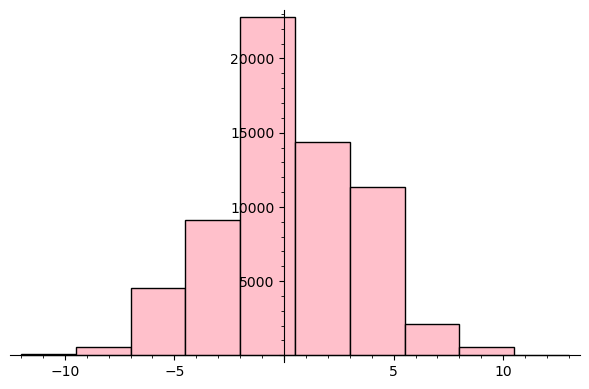

In [20]:
D = DiscreteGaussianDistributionIntegerSampler(3.2)
histogram([D() for _ in range(2^16)], color="pink")

Now lattice-based Gaussian sampling is extremely powerful.

Given an arbitrary point c and a short basis B of a lattice A, to sample a point according to a Gaussian distribution discreteized on the lattice points and centred on c.

It does not leak any information about about the lattice, thus behaving like an oracle.

Gaussian sampling can be used to create lattice-based signature schemes, as well as lattice-based identity-based encryption (where a a paradigm of public key encryption where a user's public key is its own identity, thus resolving many key-distribution problems)

Now let's use this same format to find the Gaussian Distribution of a lattice

In [7]:
from sage.stats.distributions.discrete_gaussian_lattice import DiscreteGaussianDistributionLatticeSampler

In [8]:
A = random_matrix(ZZ,2,2)
D = DiscreteGaussianDistributionLatticeSampler(A, 20.0)
S = [D() for _ in range(2^12)]
l = [vector(v.list() + [S.count(v)]) for v in set(S)]
list_plot3d(l, point_list=True, interpolation='nn')
#because it is the sampler, we'll get a different output each time

Graphics3d Object

It should be noted that this is indeed 3d as it samples over both the x and the y. 

Thus the x range needs to be a 2d matrix of size:
$$(\frac{domain * 2}{variance}, \frac{domain * 2}{variance})$$

The Y range is the tranpose of the X range matrix
$$Y = X^T$$

The Z domain is the distance between X and Y:
$$R = \sqrt{X^2 + Y^2}$$

The Z range is the result of applying the Gaussian function on the distance matrix(the Z domain)

$$Z = \frac{1}{\sqrt{2*\pi}} * e ^ {-.5*R^2}$$

In [31]:
A = random_matrix(ZZ,2,2)
D = DiscreteGaussianDistributionLatticeSampler(A, 20.0)
S = [D() for _ in range(2^12)]
l = [vector(v.list() + [S.count(v)]) for v in set(S)]
list_plot3d(l, color='green', point_list=True, interpolation='nn')

Graphics3d Object

### On to the second part!

## What topic will we delve into next...